In [434]:
#Name: Nihar Koppolu
#Advisor: Christof Teuscher

#Purpose: The purpose of this code is to manage the read in phase, create all reservoirs and generate all data sets related to reservoir accuracy.
#         This is the CLIENT program.

In [435]:
import import_ipynb
#from Data_Processing_Class import Data_Processor as Dp
import Data_Processing_Class
import CGM_Reservoir_Class

76
day time: 12.193888888888889
glucose level: 160
# points:  296


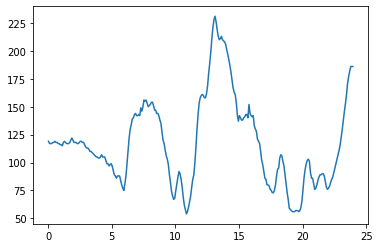

In [436]:
Data_Set = Data_Processing_Class.Data_Processor()
Data_Set.Read_Raw_Data()
Data_Set.Process_Raw_Data()
Data_Set.Graph_Single_Date()

In [437]:
import reservoirpy as rpy
from reservoirpy.nodes import Reservoir, Ridge
import numpy as np
import matplotlib.pyplot as plt

rpy.verbosity(0)#Not sure what these 2 commands do 
rpy.set_seed(42)  

reservoir = Reservoir(500, lr=0.5, sr=0.5)

readout = Ridge(ridge=1e-7)

esn = reservoir >> readout



    

In [438]:
#Training the Reservoir
no_days = len(Data_Set.complete_glucose_set)

horizon = 1  # horizon p of the forecast (predict X[t+p] from X[t])
div_factor = 154.0 #max value on day 0

date = 0
while date < no_days:

    points_in_day = len(Data_Set.complete_glucose_set[date])
    #i = 50 or
    end_point = points_in_day - 2
    #while i < points_in_day:
    train_data = np.array(Data_Set.complete_glucose_set[date])
    train_data = train_data.reshape((points_in_day, 1))

    #rescale training data
    for i in range(points_in_day):
        train_data[i] = train_data[i] / div_factor
        pass

    train_start = 0
    X_train = train_data[train_start: end_point]
    y_train = train_data[horizon + train_start: end_point + horizon]

    #training function
    esn = esn.fit(X_train, y_train, warmup=10)
    #pass

    date += 1
    pass

In [439]:
#Create function to measure accuracy over training epochs

In [440]:
#Create function that compares blood glucose prediction accuracy of 2 patients

In [441]:
#Testing the reservoir 
start_test_range = 25
end_test_range = 75
test_date = 3
points_in_day1 = len(Data_Set.complete_glucose_set[test_date])

test_data = np.array(Data_Set.complete_glucose_set[test_date])
test_data = test_data.reshape((points_in_day1, 1))
for i in range(points_in_day1):
    test_data[i] = test_data[i] / div_factor
    pass


X_test = test_data[start_test_range : end_test_range]
#y_test = test_data[start_test_range + horizon : end_test_range + horizon]

#Calling the run (test) function
y_pred = esn.run(X_test)

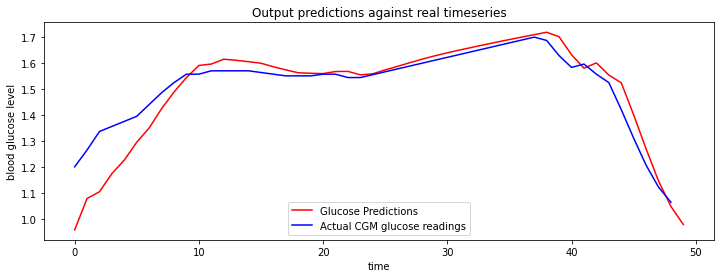

Predicted Value [0.97892772]
Actual Value [1.01298701]



In [442]:
plt.figure(figsize=(12, 4))
plt.plot(y_pred, color="red", lw=1.5, label="Glucose Predictions")
plt.plot(X_test[1:], color="blue", lw=1.5, label="Actual CGM glucose readings")
plt.title("Output predictions against real timeseries")
plt.xlabel("time")
plt.ylabel("blood glucose level")
plt.legend()
plt.show()
print("Predicted Value", y_pred[-1])
print("Actual Value",test_data[end_test_range])
print()